In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\gamezone_orders_data_cleaned.csv"
df = pd.read_csv(
    file_path,
    parse_dates=['purchase_ts_cleaned', 'ship_ts'],
    dtype={
        'purchase_year': 'Int64',
        'purchase_month': 'Int64',
        'time_to_ship': 'Int64',
        'revenue': 'float'
    },
    encoding='utf-8',
    keep_default_na=False,
    na_values=['']  # Only treat empty strings as NaN
)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   user_id                          21864 non-null  object        
 1   order_id                         21864 non-null  object        
 2   purchase_ts                      21864 non-null  object        
 3   purchase_ts_cleaned              21863 non-null  datetime64[ns]
 4   purchase_year                    21864 non-null  Int64         
 5   purchase_month                   21864 non-null  Int64         
 6   time_to_ship                     21864 non-null  Int64         
 7   ship_ts                          21864 non-null  datetime64[ns]
 8   product_name                     21864 non-null  object        
 9   product_name_cleaned             21864 non-null  object        
 10  product_id                       21864 non-null  object   

In [6]:
import pandas as pd

# Sample data
data = {
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'total_orders': [714, 17315, 3239, 320, 129],
    'unique_customers': [648, 15794, 2985, 304, 120]
}

df_summary = pd.DataFrame(data)

# Calculated metrics
df_summary['RPAC'] = df_summary['total_revenue'] / df_summary['unique_customers']  # Revenue per customer
df_summary['Orders_per_Customer'] = df_summary['total_orders'] / df_summary['unique_customers']  # Orders per customer
df_summary['AOV'] = df_summary['total_revenue'] / df_summary['total_orders']  # Average Order Value

df_summary



,marketing_channel_cleaned,total_revenue,total_orders,unique_customers,RPAC,Orders_per_Customer,AOV
0,affiliate,222428.31,714,648,343.253565,1.101852,311.524244
1,direct,5209858.66,17315,15794,329.863154,1.096302,300.887015
2,email,611182.72,3239,2985,204.751330,1.085092,188.694881
3,social media,69526.37,320,304,228.705164,1.052632,217.269906
4,unknown,38270.43,129,120,318.920250,1.075000,296.670000


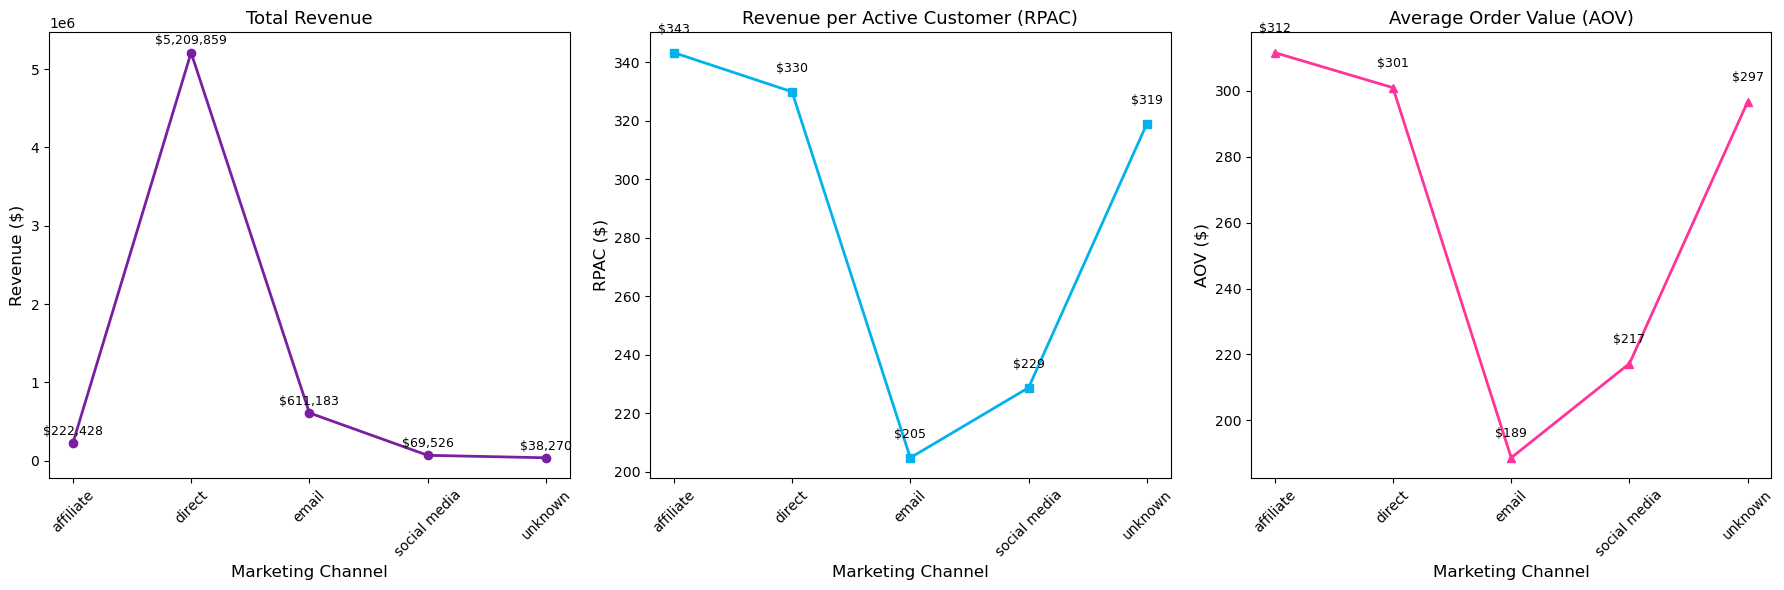

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

channels = df_summary['marketing_channel_cleaned']

# Colors for each metric
colors = {"Revenue":"#7B1FA2", "RPAC":"#03b2ed", "AOV":"#FF3399"}

# Create figure with 3 subplots (side by side)
fig, axes = plt.subplots(1, 3, figsize=(18,6), sharey=False)

# 1️⃣ Total Revenue
axes[0].plot(channels, df_summary['total_revenue'], marker='o', color=colors["Revenue"], linewidth=2)
axes[0].set_ylabel('Revenue ($)', fontsize=12)
axes[0].set_title('Total Revenue', fontsize=13)
for i, v in enumerate(df_summary['total_revenue']):
    axes[0].text(i, v + max(df_summary['total_revenue'])*0.02, f"${v:,.0f}", ha='center', fontsize=9)

# 2️⃣ RPAC
axes[1].plot(channels, df_summary['RPAC'], marker='s', color=colors["RPAC"], linewidth=2)
axes[1].set_ylabel('RPAC ($)', fontsize=12)
axes[1].set_title('Revenue per Active Customer (RPAC)', fontsize=13)
for i, v in enumerate(df_summary['RPAC']):
    axes[1].text(i, v + max(df_summary['RPAC'])*0.02, f"${v:,.0f}", ha='center', fontsize=9)

# 3️⃣ AOV
axes[2].plot(channels, df_summary['AOV'], marker='^', color=colors["AOV"], linewidth=2)
axes[2].set_ylabel('AOV ($)', fontsize=12)
axes[2].set_title('Average Order Value (AOV)', fontsize=13)
for i, v in enumerate(df_summary['AOV']):
    axes[2].text(i, v + max(df_summary['AOV'])*0.02, f"${v:,.0f}", ha='center', fontsize=9)

# X-axis label
for ax in axes:
    ax.set_xlabel('Marketing Channel', fontsize=12)
    ax.set_xticks(range(len(channels)))
    ax.set_xticklabels(channels, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


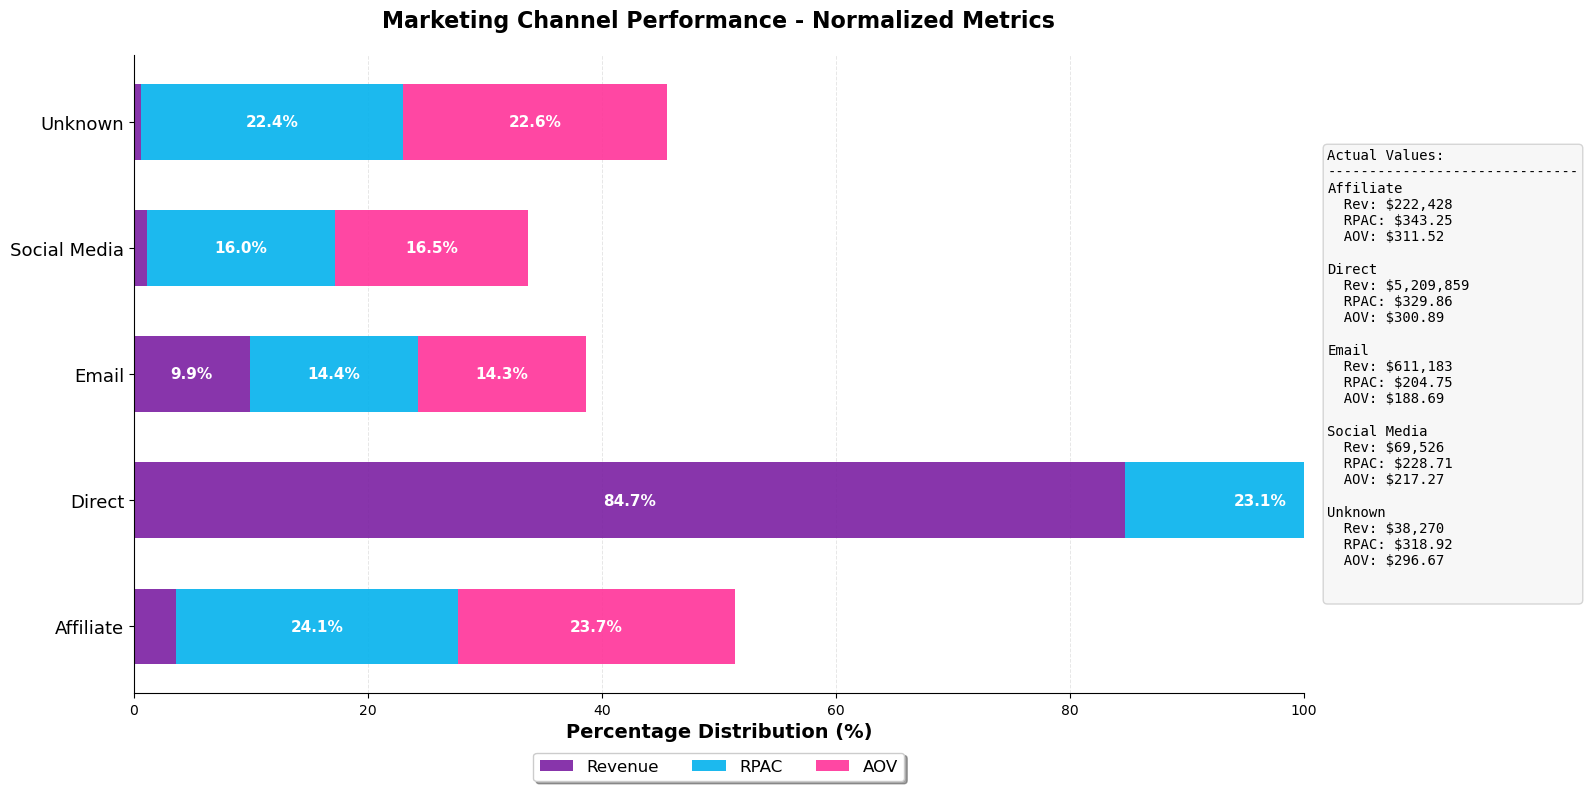

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample data
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

# Normalize the metrics to 0-100 scale for stacking
def normalize(values):
    return (values / values.sum()) * 100

channels = df_summary['marketing_channel_cleaned']
revenue_norm = normalize(df_summary['total_revenue'])
rpac_norm = normalize(df_summary['RPAC'])
aov_norm = normalize(df_summary['AOV'])

# Colors for each metric
colors = ["#7B1FA2", "#03b2ed", "#FF3399"]

# Create figure
fig, ax = plt.subplots(figsize=(16, 8))

# Create horizontal stacked bar chart
y_pos = np.arange(len(channels))
bar_height = 0.6

# Stack the bars horizontally
p1 = ax.barh(y_pos, revenue_norm, bar_height, label='Revenue', color=colors[0], alpha=0.9)
p2 = ax.barh(y_pos, rpac_norm, bar_height, left=revenue_norm, label='RPAC', color=colors[1], alpha=0.9)
p3 = ax.barh(y_pos, aov_norm, bar_height, left=revenue_norm + rpac_norm, label='AOV', color=colors[2], alpha=0.9)

# Customize chart
ax.set_yticks(y_pos)
ax.set_yticklabels([ch.title() for ch in channels], fontsize=13, fontweight='500')
ax.set_xlabel('Percentage Distribution (%)', fontsize=14, fontweight='600')
ax.set_title('Marketing Channel Performance - Normalized Metrics', fontsize=16, fontweight='700', pad=20)

# Add value labels on bars
for i, (r, rp, ao) in enumerate(zip(revenue_norm, rpac_norm, aov_norm)):
    # Revenue label
    if r > 5:
        ax.text(r/2, i, f'{r:.1f}%', ha='center', va='center', color='white', fontsize=11, fontweight='600')
    # RPAC label
    if rp > 5:
        ax.text(r + rp/2, i, f'{rp:.1f}%', ha='center', va='center', color='white', fontsize=11, fontweight='600')
    # AOV label
    if ao > 5:
        ax.text(r + rp + ao/2, i, f'{ao:.1f}%', ha='center', va='center', color='white', fontsize=11, fontweight='600')

# Add actual values table on the side
textstr = 'Actual Values:\n' + '-'*30 + '\n'
for i, ch in enumerate(channels):
    textstr += f"{ch.title()}\n"
    textstr += f"  Rev: ${df_summary['total_revenue'].iloc[i]:,.0f}\n"
    textstr += f"  RPAC: ${df_summary['RPAC'].iloc[i]:,.2f}\n"
    textstr += f"  AOV: ${df_summary['AOV'].iloc[i]:,.2f}\n\n"

props = dict(boxstyle='round', facecolor='#f5f5f5', alpha=0.8, edgecolor='#cccccc')
ax.text(1.02, 0.5, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='center', bbox=props, family='monospace')

# Legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, fontsize=12, 
          frameon=True, fancybox=True, shadow=True)

# Grid
ax.set_xlim(0, 100)
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

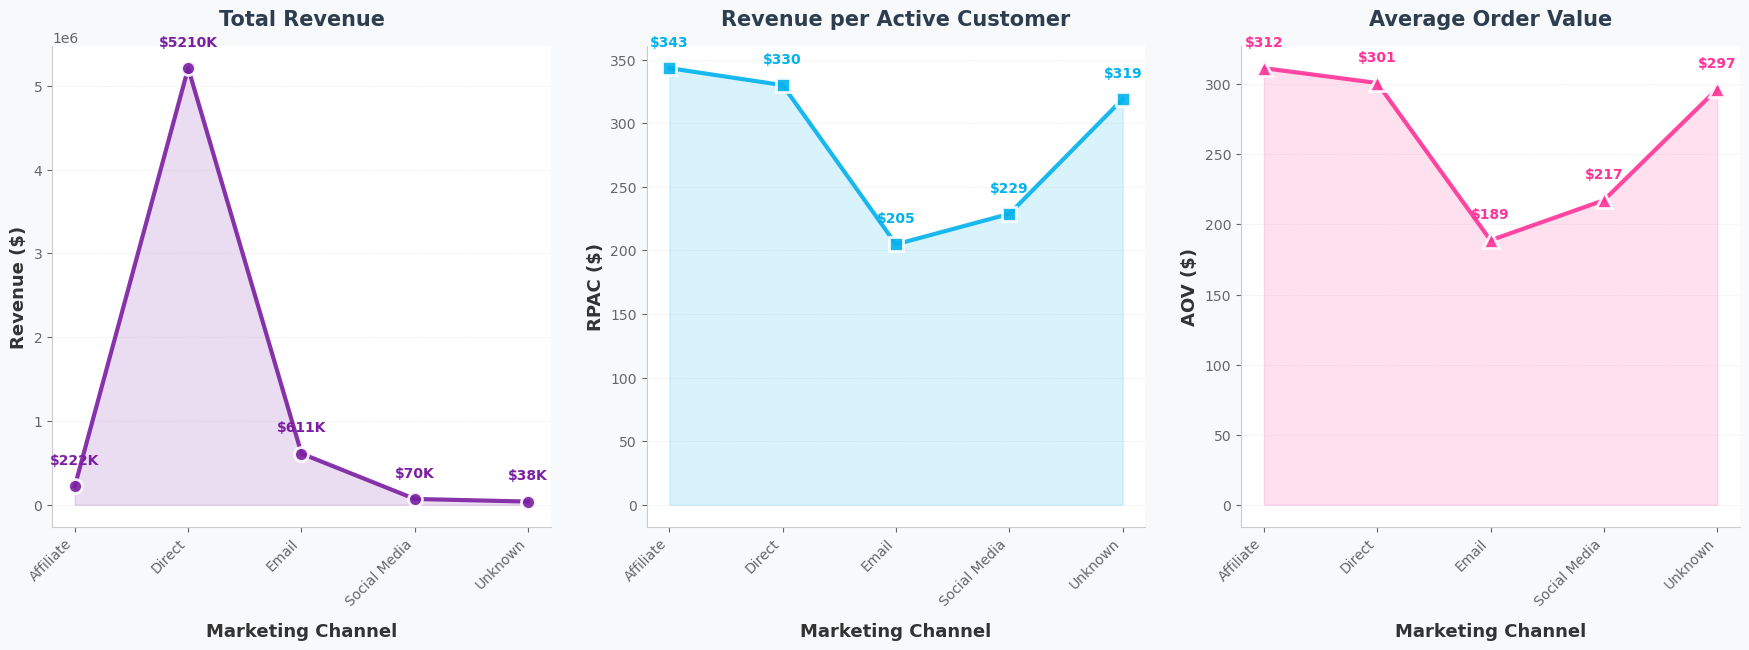

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

channels = df_summary['marketing_channel_cleaned']

# Colors for each metric
colors = {"Revenue":"#7B1FA2", "RPAC":"#03b2ed", "AOV":"#FF3399"}

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
fig.patch.set_facecolor('#f8f9fa')

# Style improvements
for ax in axes:
    ax.set_facecolor('#ffffff')
    ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#cccccc')
    ax.spines['bottom'].set_color('#cccccc')

# 1️⃣ Total Revenue
axes[0].plot(channels, df_summary['total_revenue'], marker='o', color=colors["Revenue"], 
             linewidth=3, markersize=10, markeredgewidth=2, markeredgecolor='white', 
             alpha=0.9, zorder=3)
axes[0].fill_between(range(len(channels)), df_summary['total_revenue'], alpha=0.15, 
                      color=colors["Revenue"], zorder=1)
axes[0].set_ylabel('Revenue ($)', fontsize=13, fontweight='600', color='#333333')
axes[0].set_title('Total Revenue', fontsize=15, fontweight='700', pad=15, color='#2c3e50')
for i, v in enumerate(df_summary['total_revenue']):
    axes[0].text(i, v + max(df_summary['total_revenue'])*0.05, f"${v/1000:.0f}K", 
                ha='center', fontsize=10, fontweight='600', color=colors["Revenue"])

# 2️⃣ RPAC
axes[1].plot(channels, df_summary['RPAC'], marker='s', color=colors["RPAC"], 
             linewidth=3, markersize=10, markeredgewidth=2, markeredgecolor='white', 
             alpha=0.9, zorder=3)
axes[1].fill_between(range(len(channels)), df_summary['RPAC'], alpha=0.15, 
                      color=colors["RPAC"], zorder=1)
axes[1].set_ylabel('RPAC ($)', fontsize=13, fontweight='600', color='#333333')
axes[1].set_title('Revenue per Active Customer', fontsize=15, fontweight='700', pad=15, color='#2c3e50')
for i, v in enumerate(df_summary['RPAC']):
    axes[1].text(i, v + max(df_summary['RPAC'])*0.05, f"${v:.0f}", 
                ha='center', fontsize=10, fontweight='600', color=colors["RPAC"])

# 3️⃣ AOV
axes[2].plot(channels, df_summary['AOV'], marker='^', color=colors["AOV"], 
             linewidth=3, markersize=11, markeredgewidth=2, markeredgecolor='white', 
             alpha=0.9, zorder=3)
axes[2].fill_between(range(len(channels)), df_summary['AOV'], alpha=0.15, 
                      color=colors["AOV"], zorder=1)
axes[2].set_ylabel('AOV ($)', fontsize=13, fontweight='600', color='#333333')
axes[2].set_title('Average Order Value', fontsize=15, fontweight='700', pad=15, color='#2c3e50')
for i, v in enumerate(df_summary['AOV']):
    axes[2].text(i, v + max(df_summary['AOV'])*0.05, f"${v:.0f}", 
                ha='center', fontsize=10, fontweight='600', color=colors["AOV"])

# X-axis styling
for ax in axes:
    ax.set_xlabel('Marketing Channel', fontsize=13, fontweight='600', color='#333333', labelpad=10)
    ax.set_xticks(range(len(channels)))
    ax.set_xticklabels(channels.str.title(), rotation=45, ha='right', fontsize=11)
    ax.tick_params(axis='both', colors='#666666', labelsize=10)

plt.tight_layout(pad=2.5)
plt.show()

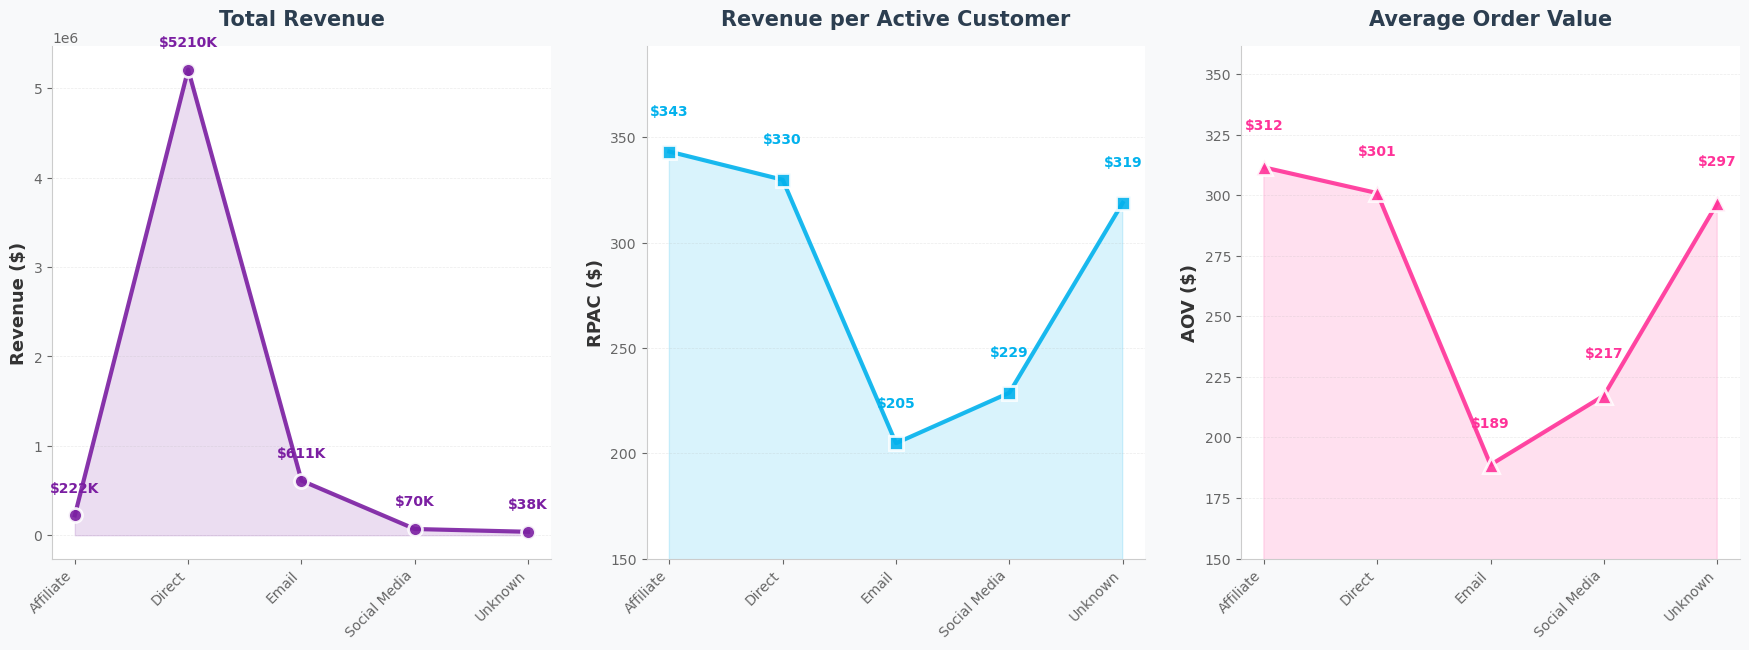

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

channels = df_summary['marketing_channel_cleaned']

# Colors for each metric
colors = {"Revenue":"#7B1FA2", "RPAC":"#03b2ed", "AOV":"#FF3399"}

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
fig.patch.set_facecolor('#f8f9fa')

# Style improvements
for ax in axes:
    ax.set_facecolor('#ffffff')
    ax.grid(True, alpha=0.25, linestyle='--', linewidth=0.5, axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('#cccccc')
    ax.spines['bottom'].set_color('#cccccc')

# 1️⃣ Total Revenue
axes[0].plot(channels, df_summary['total_revenue'], marker='o', color=colors["Revenue"], 
             linewidth=3, markersize=10, markeredgewidth=2, markeredgecolor='white', 
             alpha=0.9, zorder=3)
axes[0].fill_between(range(len(channels)), df_summary['total_revenue'], alpha=0.15, 
                      color=colors["Revenue"], zorder=1)
axes[0].set_ylabel('Revenue ($)', fontsize=13, fontweight='600', color='#333333')
axes[0].set_title('Total Revenue', fontsize=15, fontweight='700', pad=15, color='#2c3e50')
for i, v in enumerate(df_summary['total_revenue']):
    axes[0].text(i, v + max(df_summary['total_revenue'])*0.05, f"${v/1000:.0f}K", 
                ha='center', fontsize=10, fontweight='600', color=colors["Revenue"])

# 2️⃣ RPAC
axes[1].plot(channels, df_summary['RPAC'], marker='s', color=colors["RPAC"], 
             linewidth=3, markersize=10, markeredgewidth=2, markeredgecolor='white', 
             alpha=0.9, zorder=3)
axes[1].fill_between(range(len(channels)), df_summary['RPAC'], alpha=0.15, 
                      color=colors["RPAC"], zorder=1)
axes[1].set_ylabel('RPAC ($)', fontsize=13, fontweight='600', color='#333333')
axes[1].set_title('Revenue per Active Customer', fontsize=15, fontweight='700', pad=15, color='#2c3e50')
axes[1].set_ylim(150, max(df_summary['RPAC']) + 50)  # Start Y-axis from 150
for i, v in enumerate(df_summary['RPAC']):
    axes[1].text(i, v + max(df_summary['RPAC'])*0.05, f"${v:.0f}", 
                ha='center', fontsize=10, fontweight='600', color=colors["RPAC"])

# 3️⃣ AOV
axes[2].plot(channels, df_summary['AOV'], marker='^', color=colors["AOV"], 
             linewidth=3, markersize=11, markeredgewidth=2, markeredgecolor='white', 
             alpha=0.9, zorder=3)
axes[2].fill_between(range(len(channels)), df_summary['AOV'], alpha=0.15, 
                      color=colors["AOV"], zorder=1)
axes[2].set_ylabel('AOV ($)', fontsize=13, fontweight='600', color='#333333')
axes[2].set_title('Average Order Value', fontsize=15, fontweight='700', pad=15, color='#2c3e50')
axes[2].set_ylim(150, max(df_summary['AOV']) + 50)  # Start Y-axis from 150
for i, v in enumerate(df_summary['AOV']):
    axes[2].text(i, v + max(df_summary['AOV'])*0.05, f"${v:.0f}", 
                ha='center', fontsize=10, fontweight='600', color=colors["AOV"])

# X-axis styling
for ax in axes:
    ax.set_xticks(range(len(channels)))
    ax.set_xticklabels(channels.str.title(), rotation=45, ha='right', fontsize=11)
    ax.tick_params(axis='both', colors='#666666', labelsize=10)
    ax.set_xlabel('')  # Remove x-axis title

plt.tight_layout(pad=2.5)
plt.show()


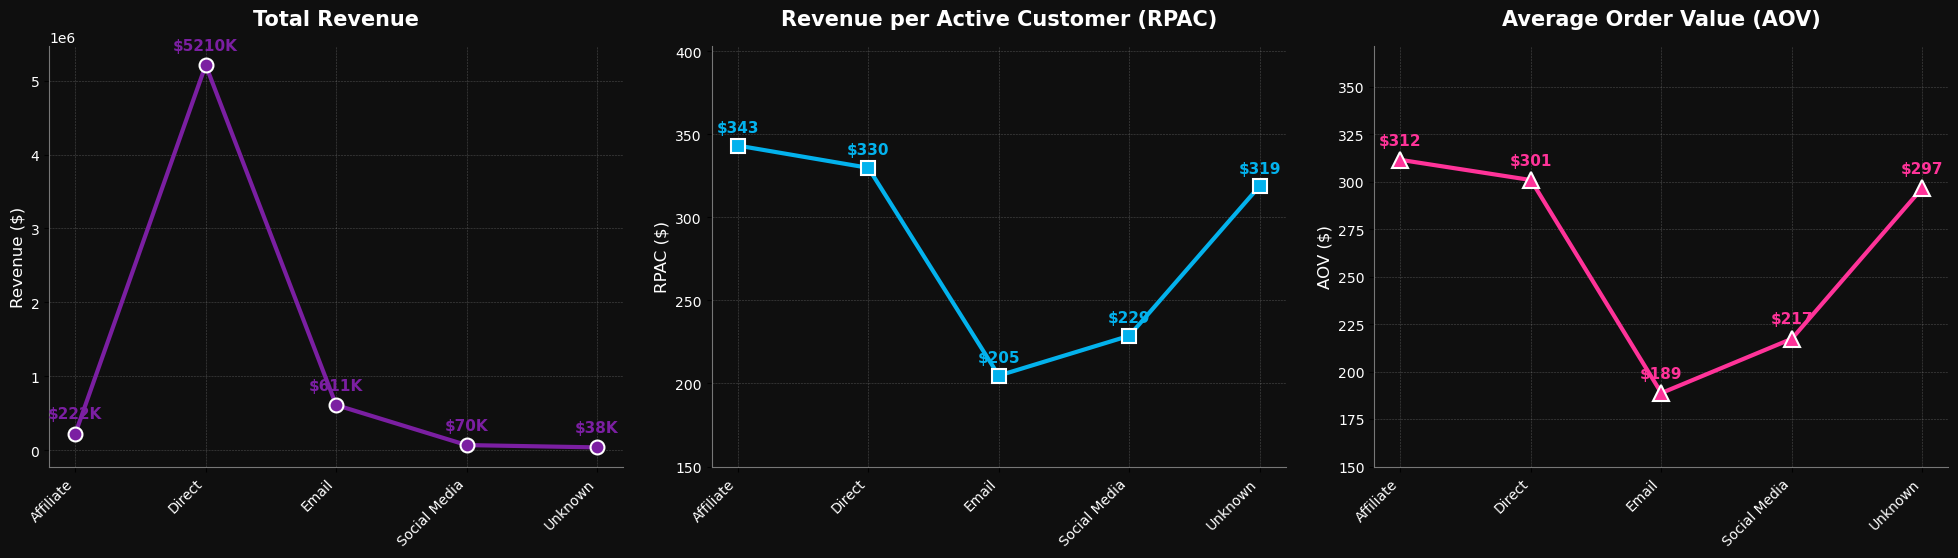

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Data
# ===============================
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

channels = df_summary['marketing_channel_cleaned']

# Brand Colors
COLOR_REV = "#7B1FA2"
COLOR_RPAC = "#03b2ed"
COLOR_AOV = "#FF3399"

# ===============================
# Figure Layout
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.patch.set_facecolor("#0f0f0f")   # dashboard dark background

for ax in axes:
    ax.set_facecolor("#0f0f0f")
    ax.grid(True, linestyle='--', linewidth=0.4, alpha=0.25, color="#ffffff")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#777777")
    ax.spines['bottom'].set_color("#777777")
    ax.tick_params(axis='both', labelcolor="white")

# ===============================
# 1️⃣ Total Revenue
# ===============================
axes[0].plot(
    channels, df_summary['total_revenue'],
    marker='o', markersize=10,
    linewidth=3, color=COLOR_REV, markeredgewidth=1.5, markeredgecolor="white"
)

axes[0].set_title("Total Revenue", fontsize=15, fontweight="bold", color="white", pad=15)
axes[0].set_ylabel("Revenue ($)", fontsize=12, color="white")

for i, v in enumerate(df_summary['total_revenue']):
    axes[0].text(
        i, v + max(df_summary['total_revenue']) * 0.04,
        f"${v/1000:.0f}K",
        ha='center', fontsize=11, fontweight="bold", color=COLOR_REV
    )

# ===============================
# 2️⃣ RPAC
# ===============================
axes[1].plot(
    channels, df_summary['RPAC'],
    marker='s', markersize=10,
    linewidth=3, color=COLOR_RPAC, markeredgewidth=1.5, markeredgecolor="white"
)

axes[1].set_title("Revenue per Active Customer (RPAC)", fontsize=15, fontweight="bold", color="white", pad=15)
axes[1].set_ylabel("RPAC ($)", fontsize=12, color="white")
axes[1].set_ylim(150, max(df_summary['RPAC']) + 60)

for i, v in enumerate(df_summary['RPAC']):
    axes[1].text(
        i, v + 8, f"${v:.0f}",
        ha='center', fontsize=11, fontweight="bold", color=COLOR_RPAC
    )

# ===============================
# 3️⃣ AOV
# ===============================
axes[2].plot(
    channels, df_summary['AOV'],
    marker='^', markersize=11,
    linewidth=3, color=COLOR_AOV, markeredgewidth=1.5, markeredgecolor="white"
)

axes[2].set_title("Average Order Value (AOV)", fontsize=15, fontweight="bold", color="white", pad=15)
axes[2].set_ylabel("AOV ($)", fontsize=12, color="white")
axes[2].set_ylim(150, max(df_summary['AOV']) + 60)

for i, v in enumerate(df_summary['AOV']):
    axes[2].text(
        i, v + 8, f"${v:.0f}",
        ha='center', fontsize=11, fontweight="bold", color=COLOR_AOV
    )

# ===============================
# X-axis labels
# ===============================
for ax in axes:
    ax.set_xticks(range(len(channels)))
    ax.set_xticklabels(
        channels.str.title(),
        rotation=45, ha='right',
        fontsize=10, color="white"
    )

plt.tight_layout(pad=2.2)
plt.show()


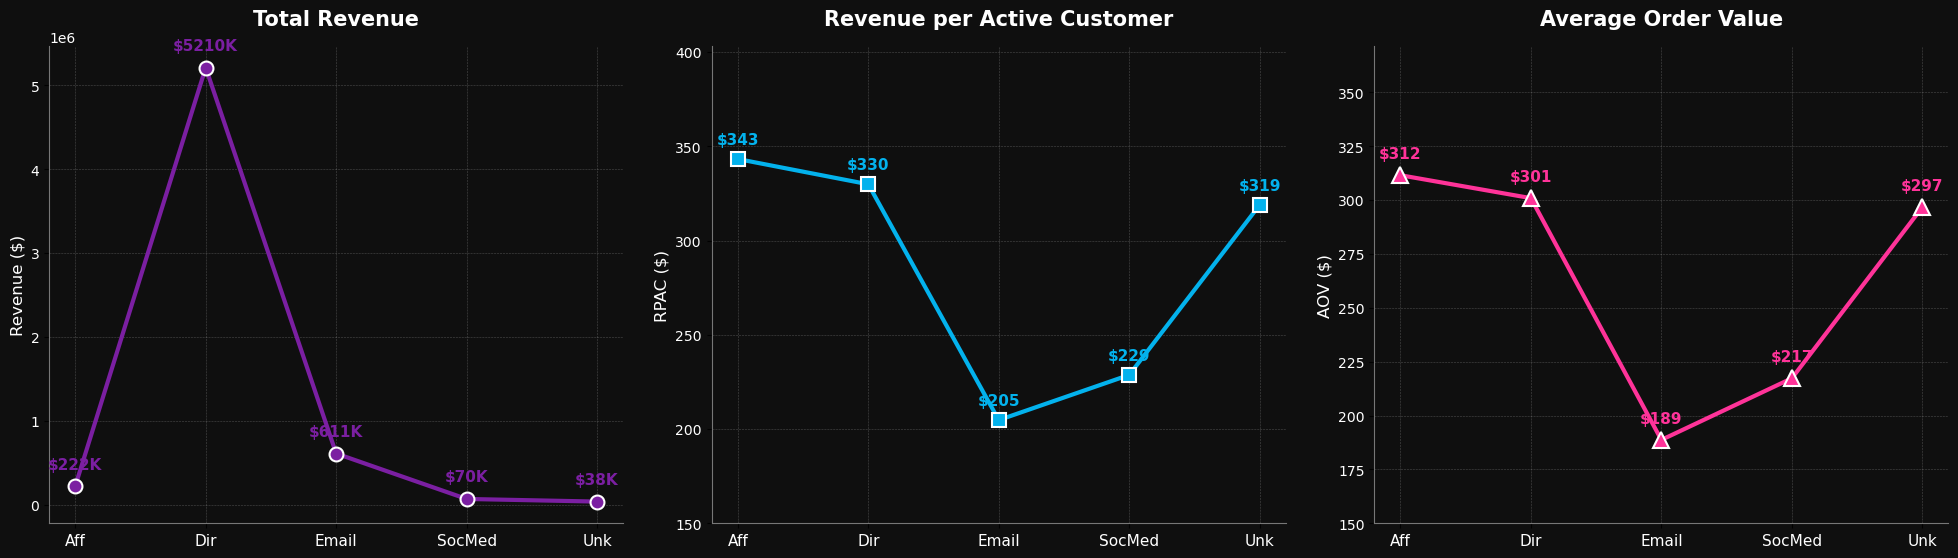

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Data
# ===============================
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

# Abbreviated labels
label_map = {
    "affiliate": "Aff",
    "direct": "Dir",
    "email": "Email",
    "social media": "SocMed",
    "unknown": "Unk"
}
labels = df_summary['marketing_channel_cleaned'].map(label_map)

# Brand Colors
COLOR_REV = "#7B1FA2"
COLOR_RPAC = "#03b2ed"
COLOR_AOV = "#FF3399"

# ===============================
# Figure Layout
# ===============================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.patch.set_facecolor("#0f0f0f")  # dashboard dark background

for ax in axes:
    ax.set_facecolor("#0f0f0f")
    ax.grid(True, linestyle='--', linewidth=0.4, alpha=0.25, color="#ffffff")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#777777")
    ax.spines['bottom'].set_color("#777777")
    ax.tick_params(axis='both', labelcolor="white", labelsize=10)

# ===============================
# 1️⃣ Total Revenue
# ===============================
axes[0].plot(
    labels, df_summary['total_revenue'],
    marker='o', markersize=10,
    linewidth=3, color=COLOR_REV, markeredgewidth=1.5, markeredgecolor="white"
)
axes[0].set_title("Total Revenue", fontsize=15, fontweight="bold", color="white", pad=15)
axes[0].set_ylabel("Revenue ($)", fontsize=12, color="white")

# labels
for i, v in enumerate(df_summary['total_revenue']):
    axes[0].text(
        i, v + max(df_summary['total_revenue']) * 0.04,
        f"${v/1000:.0f}K", ha='center',
        fontsize=11, fontweight="bold", color=COLOR_REV
    )

# ===============================
# 2️⃣ RPAC
# ===============================
axes[1].plot(
    labels, df_summary['RPAC'],
    marker='s', markersize=10,
    linewidth=3, color=COLOR_RPAC, markeredgewidth=1.5, markeredgecolor="white"
)
axes[1].set_title("Revenue per Active Customer", fontsize=15, fontweight="bold", color="white", pad=15)
axes[1].set_ylabel("RPAC ($)", fontsize=12, color="white")
axes[1].set_ylim(150, max(df_summary['RPAC']) + 60)

for i, v in enumerate(df_summary['RPAC']):
    axes[1].text(
        i, v + 8, f"${v:.0f}",
        ha='center', fontsize=11, fontweight="bold", color=COLOR_RPAC
    )

# ===============================
# 3️⃣ AOV
# ===============================
axes[2].plot(
    labels, df_summary['AOV'],
    marker='^', markersize=11,
    linewidth=3, color=COLOR_AOV, markeredgewidth=1.5, markeredgecolor="white"
)
axes[2].set_title("Average Order Value", fontsize=15, fontweight="bold", color="white", pad=15)
axes[2].set_ylabel("AOV ($)", fontsize=12, color="white")
axes[2].set_ylim(150, max(df_summary['AOV']) + 60)

for i, v in enumerate(df_summary['AOV']):
    axes[2].text(
        i, v + 8, f"${v:.0f}",
        ha='center', fontsize=11, fontweight="bold", color=COLOR_AOV
    )

# ===============================
# X-Axis (straight labels)
# ===============================
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=11, color="white")

plt.tight_layout(pad=2.2)
plt.show()


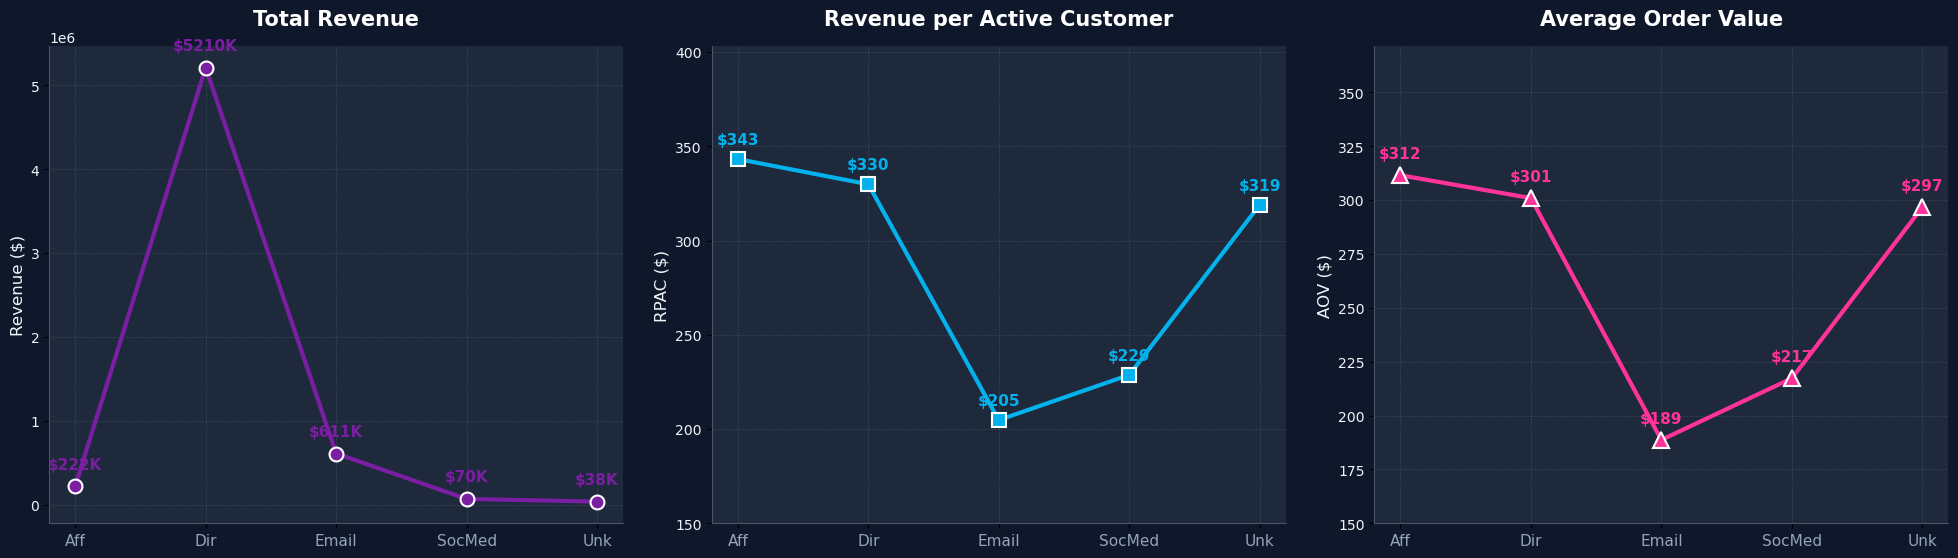

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Data
# ===============================
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

# Abbreviated x-axis labels
label_map = {
    "affiliate": "Aff",
    "direct": "Dir",
    "email": "Email",
    "social media": "SocMed",
    "unknown": "Unk"
}
labels = df_summary['marketing_channel_cleaned'].map(label_map)

# Brand Colors
COLOR_REV = "#7B1FA2"
COLOR_RPAC = "#03b2ed"
COLOR_AOV = "#FF3399"

# ==========================================
#    FIGURE + SUBPLOT CREATION
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# FIGURE BACKGROUND
fig.patch.set_facecolor("#0f172a")   # very dark slate blue

# APPLY PLOT BACKGROUND + STYLING
for ax in axes:
    ax.set_facecolor("#1e293b")  # plot area dark slate
    ax.grid(True, linestyle='--', linewidth=0.45, alpha=0.25, color="#94a3b8")
    
    # Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#475569")
    ax.spines['bottom'].set_color("#475569")  # subtle bottom border
    
    ax.tick_params(axis='y', labelcolor="#f1f5f9", labelsize=10)
    ax.tick_params(axis='x', labelcolor="#94a3b8", labelsize=10)

# ==========================================
#   1️⃣ TOTAL REVENUE
# ==========================================
axes[0].plot(
    labels, df_summary['total_revenue'],
    marker='o', markersize=10,
    linewidth=3, color=COLOR_REV,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[0].set_title("Total Revenue", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[0].set_ylabel("Revenue ($)", fontsize=12, color="#f1f5f9")

for i, v in enumerate(df_summary['total_revenue']):
    axes[0].text(
        i, v + max(df_summary['total_revenue']) * 0.04,
        f"${v/1000:.0f}K",
        ha='center', fontsize=11, fontweight="bold", color=COLOR_REV
    )

# ==========================================
#   2️⃣ RPAC
# ==========================================
axes[1].plot(
    labels, df_summary['RPAC'],
    marker='s', markersize=10,
    linewidth=3, color=COLOR_RPAC,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[1].set_title("Revenue per Active Customer", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[1].set_ylabel("RPAC ($)", fontsize=12, color="#f1f5f9")
axes[1].set_ylim(150, max(df_summary['RPAC']) + 60)

for i, v in enumerate(df_summary['RPAC']):
    axes[1].text(
        i, v + 8,
        f"${v:.0f}", ha='center',
        fontsize=11, fontweight="bold", color=COLOR_RPAC
    )

# ==========================================
#   3️⃣ AOV
# ==========================================
axes[2].plot(
    labels, df_summary['AOV'],
    marker='^', markersize=11,
    linewidth=3, color=COLOR_AOV,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[2].set_title("Average Order Value", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[2].set_ylabel("AOV ($)", fontsize=12, color="#f1f5f9")
axes[2].set_ylim(150, max(df_summary['AOV']) + 60)

for i, v in enumerate(df_summary['AOV']):
    axes[2].text(
        i, v + 8,
        f"${v:.0f}", ha='center',
        fontsize=11, fontweight="bold", color=COLOR_AOV
    )

# ===============================
# X-Axis styling
# ===============================
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=11)

plt.tight_layout(pad=2.2)
plt.show()


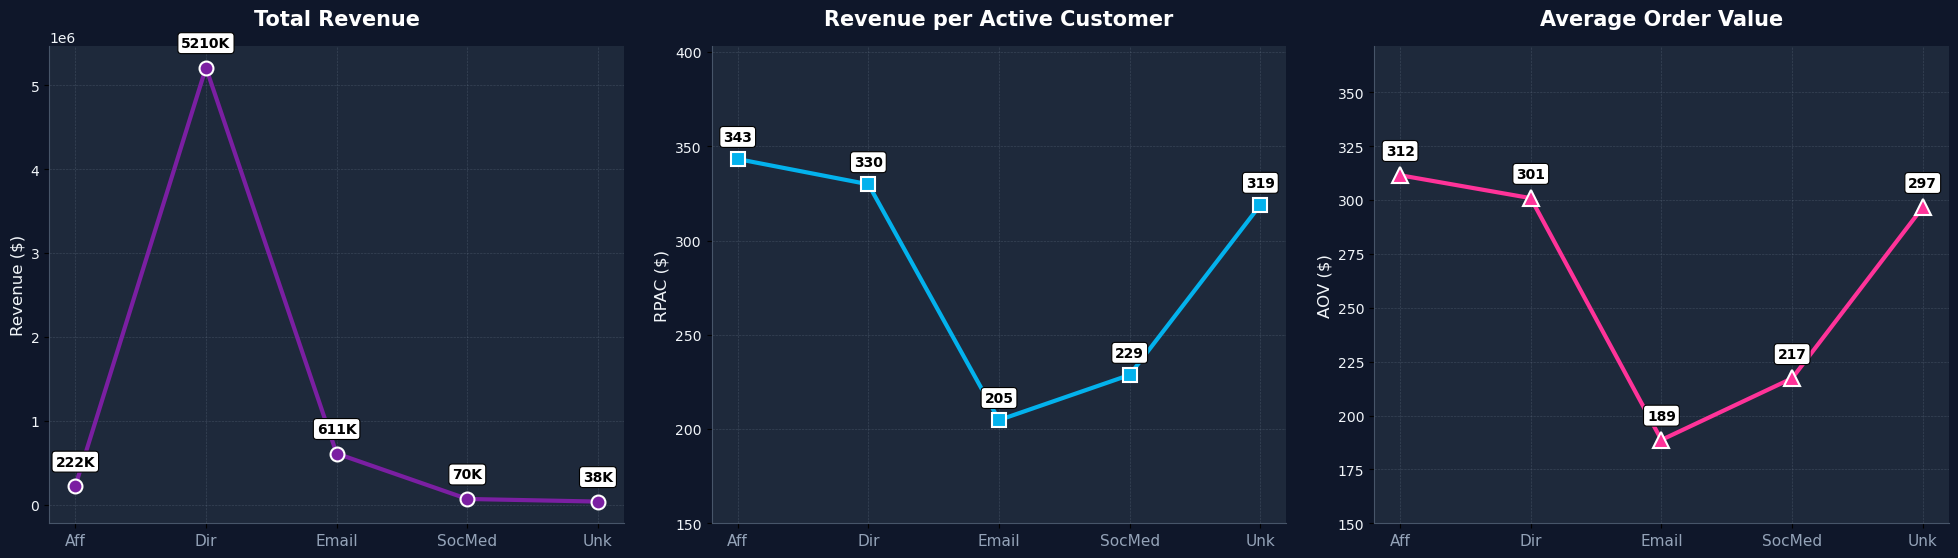

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ===============================
# Data
# ===============================
df_summary = pd.DataFrame({
    'marketing_channel_cleaned': ['affiliate', 'direct', 'email', 'social media', 'unknown'],
    'total_revenue': [222428.31, 5209858.66, 611182.72, 69526.37, 38270.43],
    'RPAC': [343.25, 329.86, 204.75, 228.71, 318.92],
    'AOV': [311.52, 300.89, 188.69, 217.27, 296.67]
})

# Abbreviated x-axis labels
label_map = {
    "affiliate": "Aff",
    "direct": "Dir",
    "email": "Email",
    "social media": "SocMed",
    "unknown": "Unk"
}
labels = df_summary['marketing_channel_cleaned'].map(label_map)

# Brand Colors
COLOR_REV = "#7B1FA2"
COLOR_RPAC = "#03b2ed"
COLOR_AOV = "#FF3399"

# ==========================================
#    FIGURE + SUBPLOT CREATION
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.patch.set_facecolor("#0f172a")   # very dark slate blue

# APPLY PLOT BACKGROUND + STYLING
for ax in axes:
    ax.set_facecolor("#1e293b")  # plot area dark slate
    ax.grid(True, linestyle='--', linewidth=0.45, alpha=0.25, color="#94a3b8")
    
    # Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color("#475569")
    ax.spines['bottom'].set_color("#475569")  # subtle bottom border
    
    ax.tick_params(axis='y', labelcolor="#f1f5f9", labelsize=10)
    ax.tick_params(axis='x', labelcolor="#94a3b8", labelsize=10)

# Helper function → White box with black text
def label_box(ax, x, y, text):
    ax.text(
        x, y,
        text,
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
        color="black",
        bbox=dict(
            facecolor="white",
            edgecolor="black",
            boxstyle="round,pad=0.25",
            linewidth=0.8
        )
    )

# ==========================================
#   1️⃣ TOTAL REVENUE
# ==========================================
axes[0].plot(
    labels, df_summary['total_revenue'],
    marker='o', markersize=10,
    linewidth=3, color=COLOR_REV,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[0].set_title("Total Revenue", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[0].set_ylabel("Revenue ($)", fontsize=12, color="#f1f5f9")

for i, v in enumerate(df_summary['total_revenue']):
    label_box(axes[0], i, v + max(df_summary['total_revenue']) * 0.04, f"{v/1000:.0f}K")

# ==========================================
#   2️⃣ RPAC
# ==========================================
axes[1].plot(
    labels, df_summary['RPAC'],
    marker='s', markersize=10,
    linewidth=3, color=COLOR_RPAC,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[1].set_title("Revenue per Active Customer", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[1].set_ylabel("RPAC ($)", fontsize=12, color="#f1f5f9")
axes[1].set_ylim(150, max(df_summary['RPAC']) + 60)

for i, v in enumerate(df_summary['RPAC']):
    label_box(axes[1], i, v + 8, f"{v:.0f}")

# ==========================================
#   3️⃣ AOV
# ==========================================
axes[2].plot(
    labels, df_summary['AOV'],
    marker='^', markersize=11,
    linewidth=3, color=COLOR_AOV,
    markeredgewidth=1.5, markeredgecolor="#ffffff"
)
axes[2].set_title("Average Order Value", fontsize=15, fontweight="bold", color="#ffffff", pad=15)
axes[2].set_ylabel("AOV ($)", fontsize=12, color="#f1f5f9")
axes[2].set_ylim(150, max(df_summary['AOV']) + 60)

for i, v in enumerate(df_summary['AOV']):
    label_box(axes[2], i, v + 8, f"{v:.0f}")

# ===============================
# X-Axis styling
# ===============================
for ax in axes:
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=0, ha='center', fontsize=11)

plt.tight_layout(pad=2.2)
plt.show()
